# Retrieve data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
start_notebook = time.time()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
well_name = "LLB-10"
data = pd.read_csv(f"/content/drive/MyDrive/riset-fttm-gdrive/cuml-tf-model-hydrocarbon-prediction/data/interpreted/interpreted_{well_name}.csv", sep=',')

In [5]:
df=data[['CALI','DRHO','GR','MR','NPHI_corr','PEF','RHOB_CORR','ROP']]
df

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
0,12.415,0.044,66.597,1.218,0.4272,3.013,2.318,274.659
1,12.560,0.018,66.809,1.210,0.4326,2.916,2.290,274.659
2,12.563,0.004,65.399,1.210,0.4481,2.845,2.265,274.659
3,13.139,0.012,64.328,1.236,0.4469,2.600,2.267,274.659
4,13.397,0.031,67.245,1.239,0.4317,2.478,2.276,319.478
...,...,...,...,...,...,...,...,...
796,12.810,0.149,71.371,1.929,0.4603,3.151,2.356,147.027
797,12.733,0.155,72.914,2.032,0.4665,3.256,2.350,147.027
798,13.073,0.163,70.924,2.097,0.4723,3.258,2.345,147.027
799,12.815,0.171,69.881,1.926,0.4702,3.237,2.353,147.027


# Raw data visualizations

In [6]:
import numpy as np

from scipy.stats import shapiro
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

## Structure

In [7]:
#Struktur Data
print("Dimensi DataFrame:", data.shape)
print("Kolom DataFrame:", data.columns)
print("Tipe Data:", data.dtypes)

Dimensi DataFrame: (801, 38)
Kolom DataFrame: Index(['WELL', 'DEPT', 'CALI', 'DRHO', 'DT_MAA', 'GR', 'MR', 'SR', 'NPHI',
       'PEF', 'RHOB_CORR', 'ROP', 'DR', 'RHOB', 'VSH', 'RW',
       'hydrocarbon_formation_class', 'NPHI_corr', 'VCLGR', 'VCLRT', 'VCLND',
       'VCL', 'PHID', 'PHIDshc', 'PHI_SIMANDOUX', 'PHIN', 'PHINshc', 'PHIxND',
       'PHIE', 'CEC', 'T', 'SWarchie', 'SWsimandoux', 'SWindonesia',
       'SWwaxman', 'BVW', 'matrix', 'PERMtimur'],
      dtype='object')
Tipe Data: WELL                            object
DEPT                           float64
CALI                           float64
DRHO                           float64
DT_MAA                         float64
GR                             float64
MR                             float64
SR                             float64
NPHI                           float64
PEF                            float64
RHOB_CORR                      float64
ROP                            float64
DR                             float64
RH

## Empty data

In [8]:
#Memeriksa Data yang Hilang
print("\nData yang Hilang:\n", df.isnull().sum())


Data yang Hilang:
 CALI         0
DRHO         0
GR           0
MR           0
NPHI_corr    0
PEF          0
RHOB_CORR    0
ROP          0
dtype: int64


## Basic descriptive statistics

In [9]:
#Statistik Deskriptif
print("\nStatistik Deskriptif:\n", df.describe(include='all'))


Statistik Deskriptif:
              CALI        DRHO          GR          MR   NPHI_corr         PEF  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean    12.852684    0.147918   64.987356    1.491302    0.431560    2.942056   
std      0.437300    0.085982    7.696345    0.765334    0.045783    0.404699   
min     11.723000   -0.059000   29.868000    0.880000    0.192200    1.903000   
25%     12.563000    0.090000   60.014000    1.264000    0.405400    2.719000   
50%     12.777000    0.133000   65.089000    1.314000    0.429600    2.884000   
75%     13.073000    0.183000   70.314000    1.408000    0.464300    3.128000   
max     14.745000    0.563000   88.665000    9.355000    0.544700    5.303000   

        RHOB_CORR         ROP  
count  801.000000  801.000000  
mean     2.340403  215.057337  
std      0.075401   77.373742  
min      2.097800   22.653000  
25%      2.294000  150.378000  
50%      2.334000  215.220000  
75%      2.378000  273

## Distributions

In [10]:
def histogram_norm(dataframe,judul=''):
  for column in dataframe.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram
    sns.histplot(dataframe[column], kde=False, bins=30, color='blue', alpha=0.6, label='Data Histogram')

    # Tambahkan kurva normal
    mean, std = dataframe[column].mean(), dataframe[column].std()
    x = np.linspace(dataframe[column].min(), dataframe[column].max(), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    plt.plot(x, y * len(dataframe[column]) * (dataframe[column].max() - dataframe[column].min()) / 30, color='red', label='Normal Curve')

    # Label dan judul
    plt.title(f'Distribusi {column} {judul}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

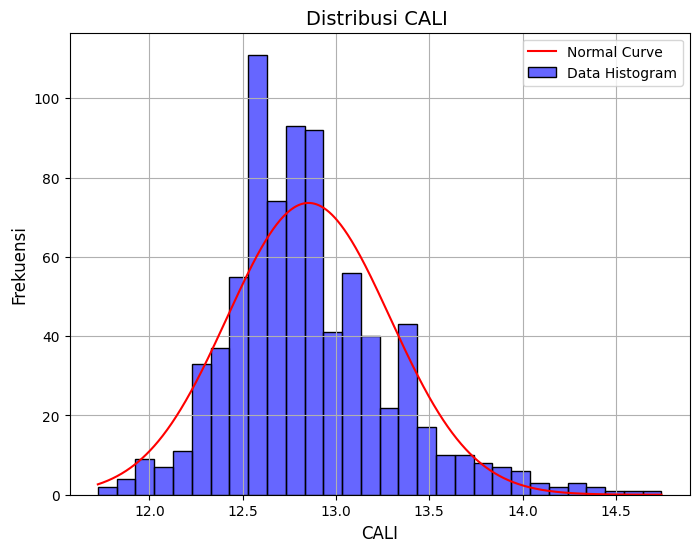

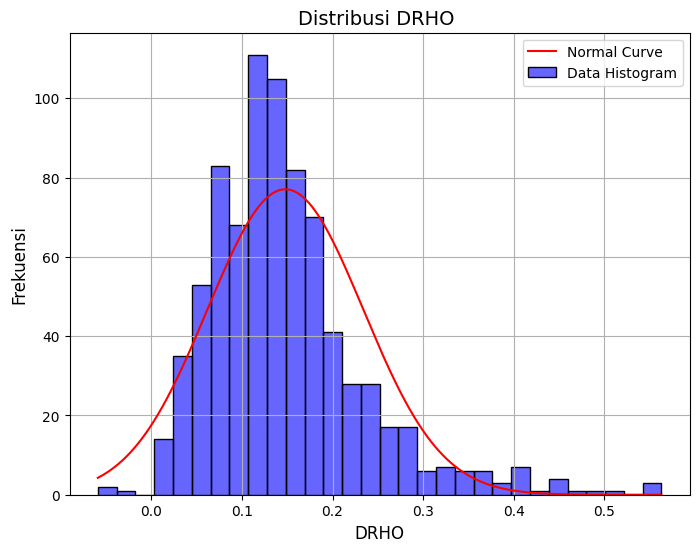

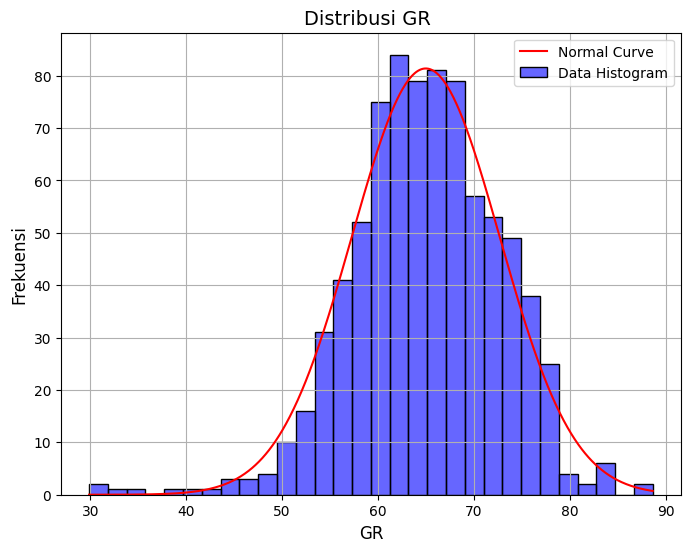

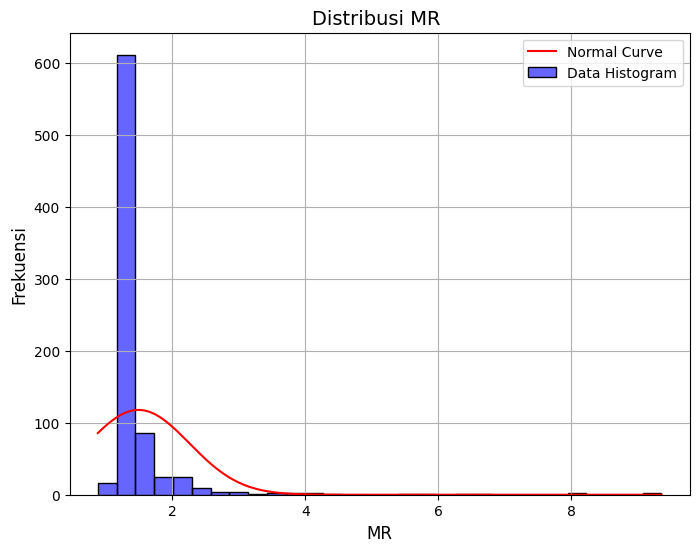

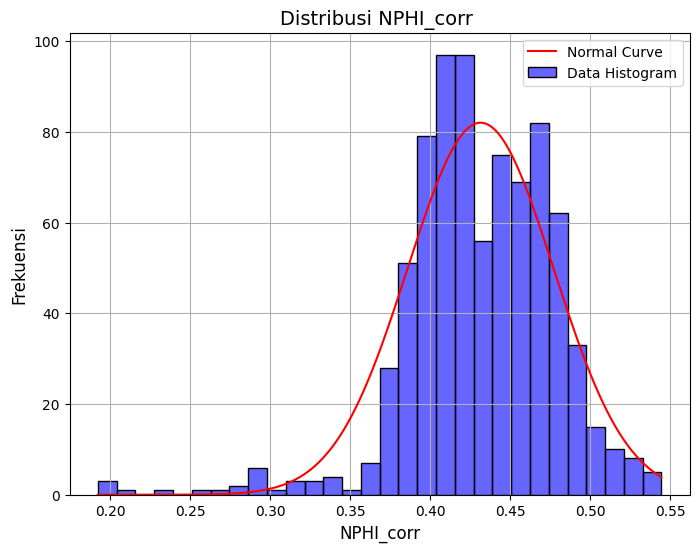

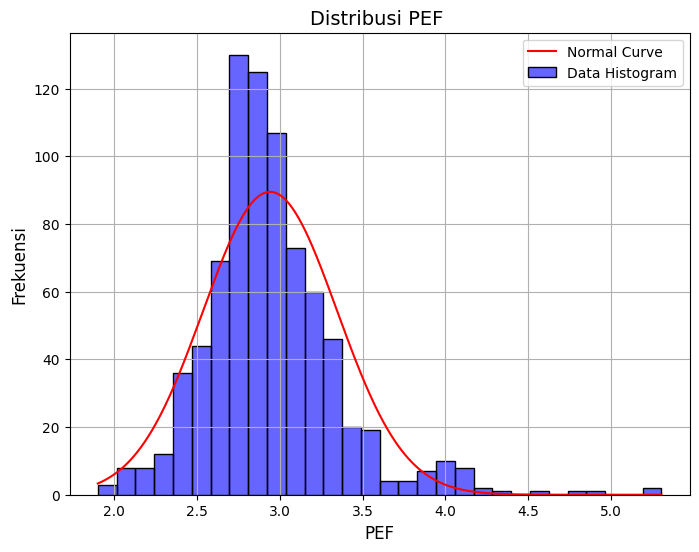

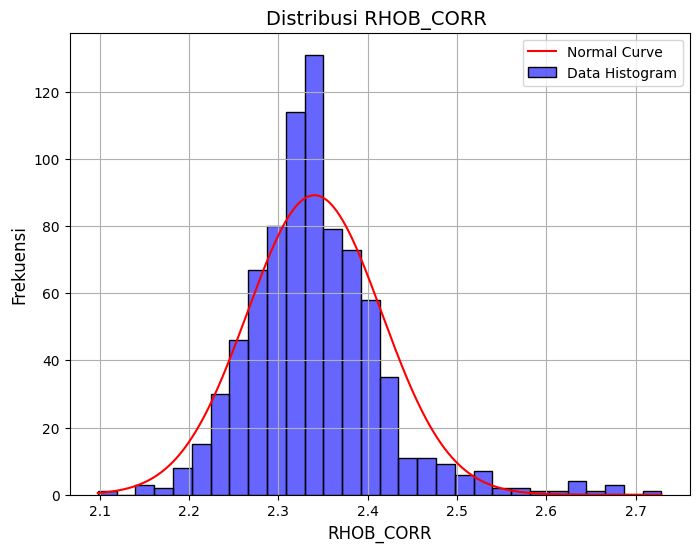

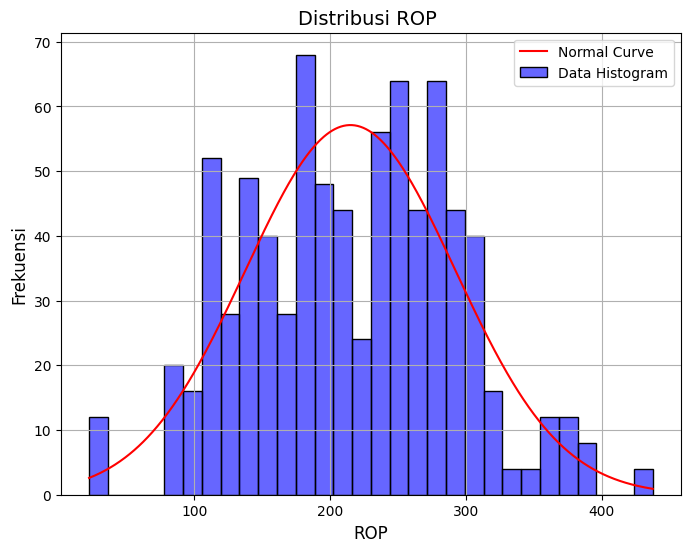

In [11]:
histogram_norm(df,judul='')

In [12]:
shapiro_results = df.apply(lambda col: shapiro(col)[1])  # [0] adalah p-value
shapiro_results

,0
CALI,1.627848e-13
DRHO,2.858668e-21
GR,8.736448e-08
MR,6.023484e-47
NPHI_corr,4.794962e-17
PEF,8.595929e-20
RHOB_CORR,8.988056e-18
ROP,1.196160e-05


## Boxplot

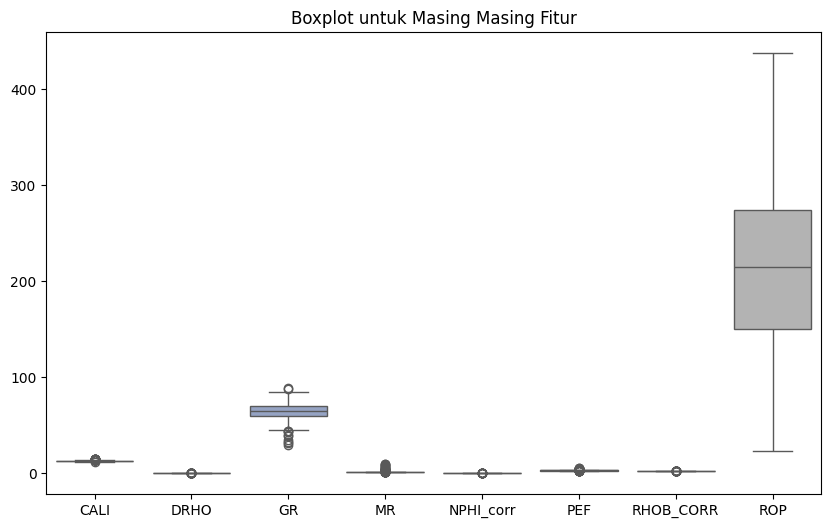

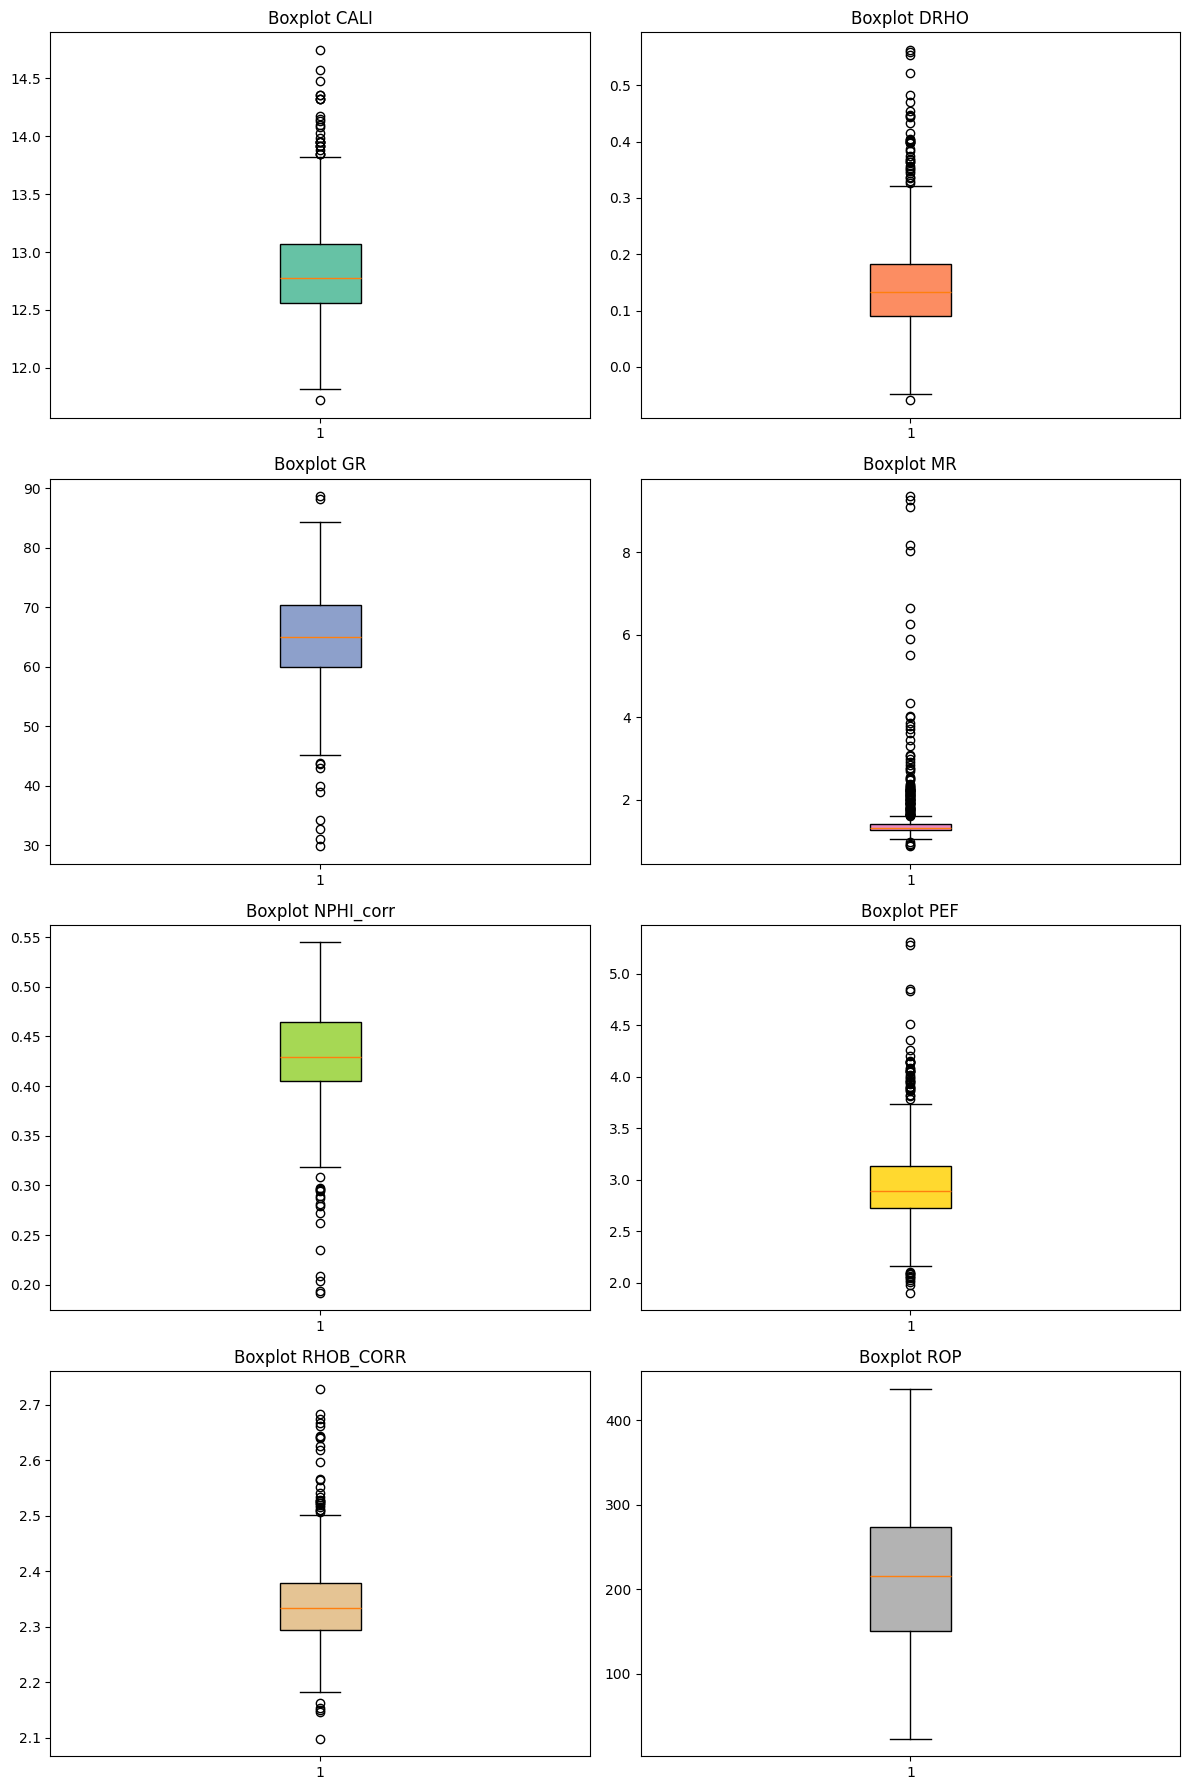

In [13]:
#Visualisasi Data


boxplot_palette = sns.color_palette("Set2", len(df.columns))


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette=boxplot_palette)
plt.title('Boxplot untuk Masing Masing Fitur')
plt.show()


fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.flatten()

for i, (column, color) in enumerate(zip(df.columns, boxplot_palette)):
    axes[i].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

## Correlation

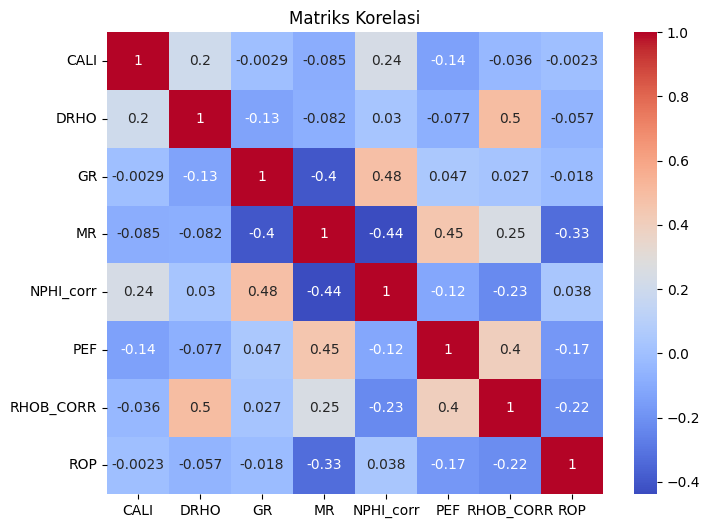

In [14]:
#Korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Data Preparation

## Train/Test Splitting

In [15]:
# Misalkan 'data' adalah DataFrame Anda dan 'df' adalah fitur yang telah Anda ekstrak
X = df  # Fitur
y = data['hydrocarbon_formation_class']  # Label

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
X_train.describe()

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,12.846042,0.145117,64.793952,1.497077,0.430028,2.947128,2.340634,215.547194
std,0.439068,0.081481,7.679104,0.787070,0.046061,0.400859,0.074396,78.099711
min,11.723000,-0.059000,29.868000,0.880000,0.192200,2.003000,2.149000,22.653000
25%,12.563000,0.089000,59.811500,1.264000,0.403500,2.725000,2.296000,149.857000
50%,12.777000,0.133000,64.936500,1.314000,0.425950,2.889000,2.334000,215.314500
75%,13.073000,0.181250,69.760500,1.418500,0.463625,3.130750,2.377000,276.452000
max,14.572000,0.563000,88.665000,9.355000,0.544700,5.303000,2.729000,437.634000


## Feature Transformation Analysis

### Histogram & Normal distribution

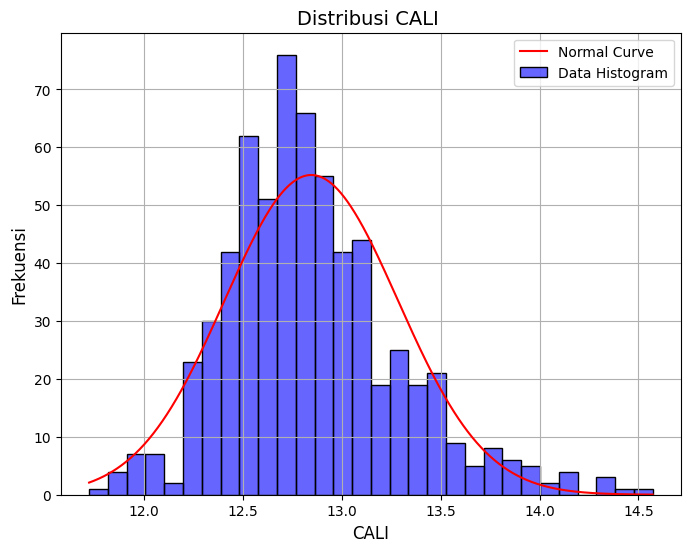

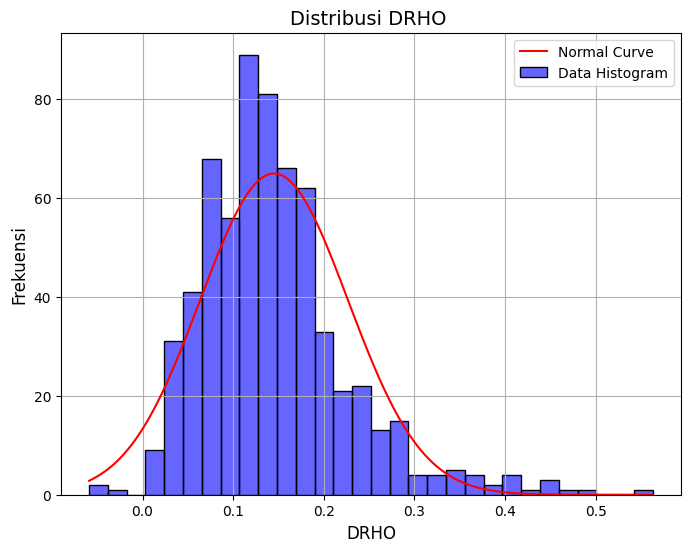

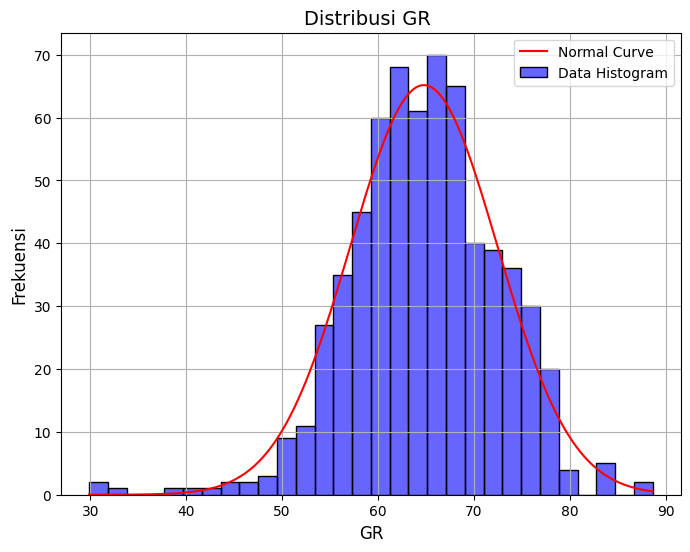

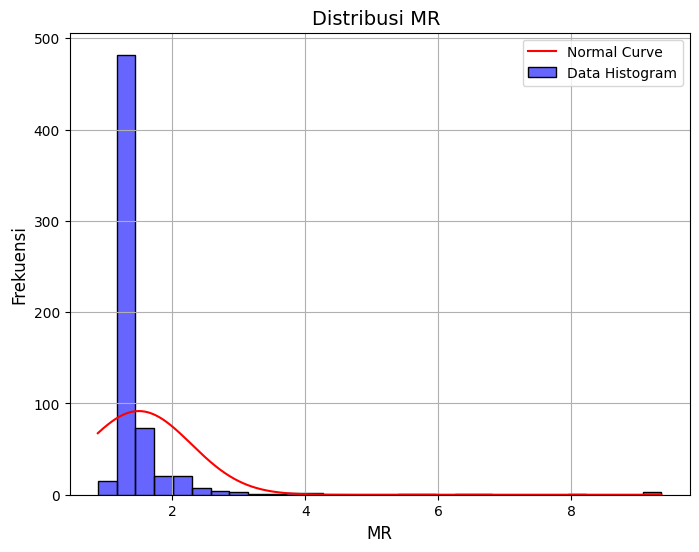

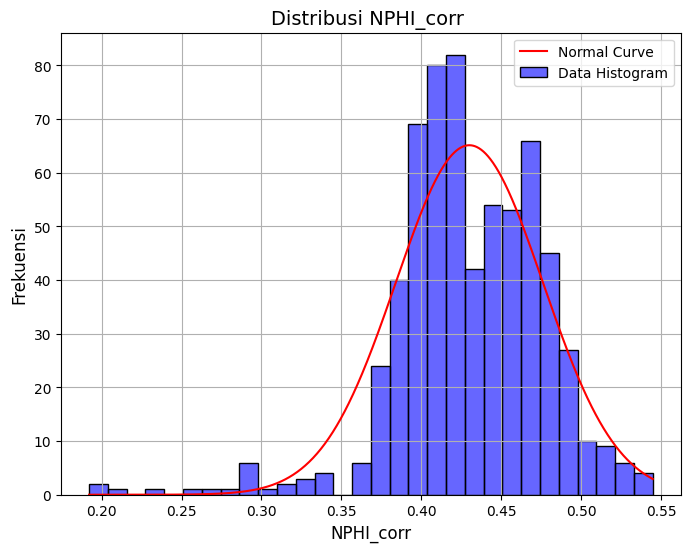

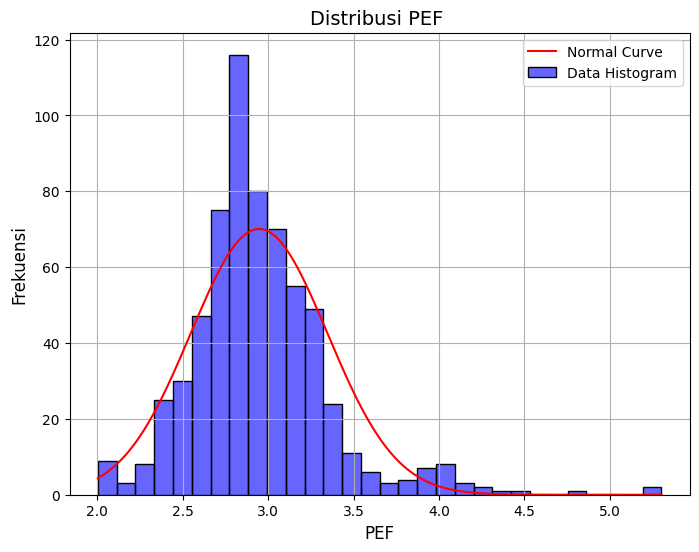

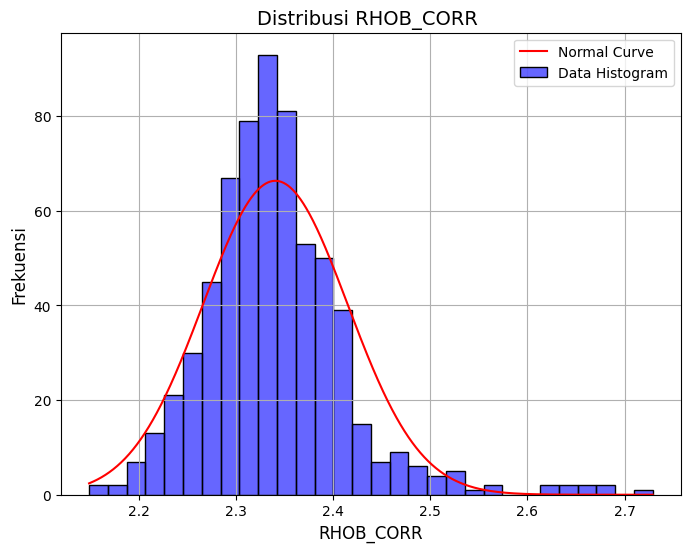

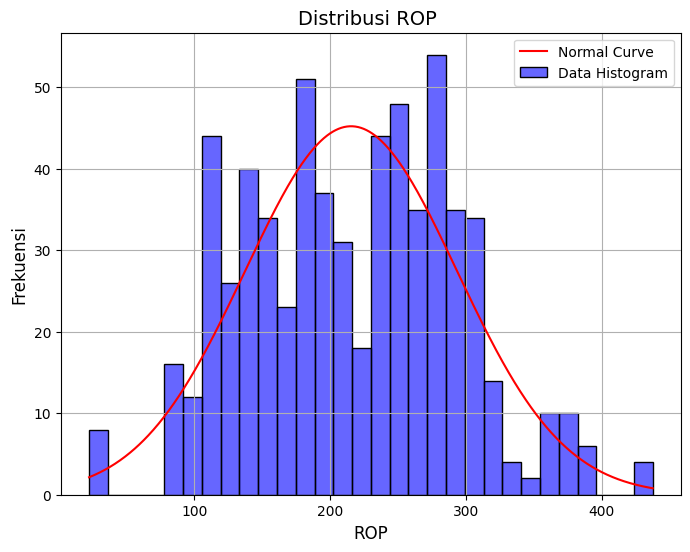

In [17]:
histogram_norm(X_train,judul='')

### Box-Cox Transformation

In [18]:
from scipy.special import boxcox1p

tmp_X_bc=X_train.copy()

lam = 0.3
for column in tmp_X_bc.columns:
  tmp_X_bc[column]=boxcox1p(tmp_X_bc[column],lam)

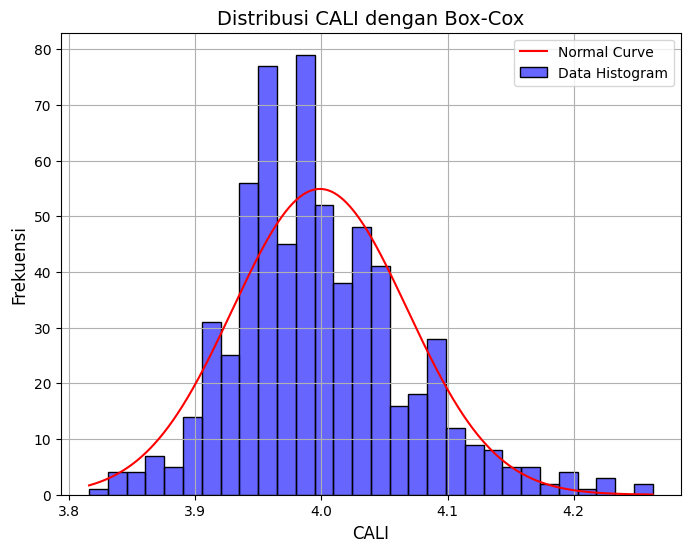

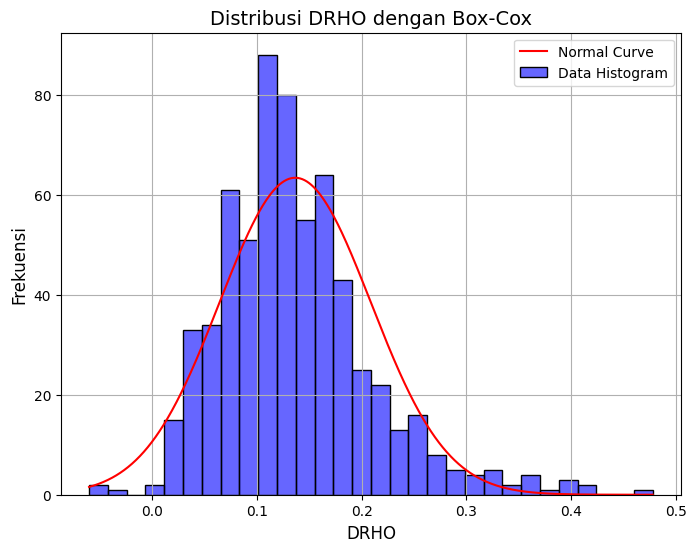

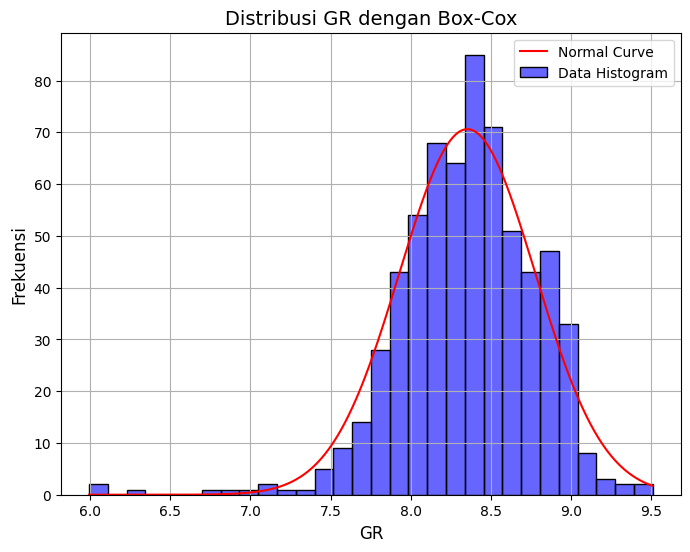

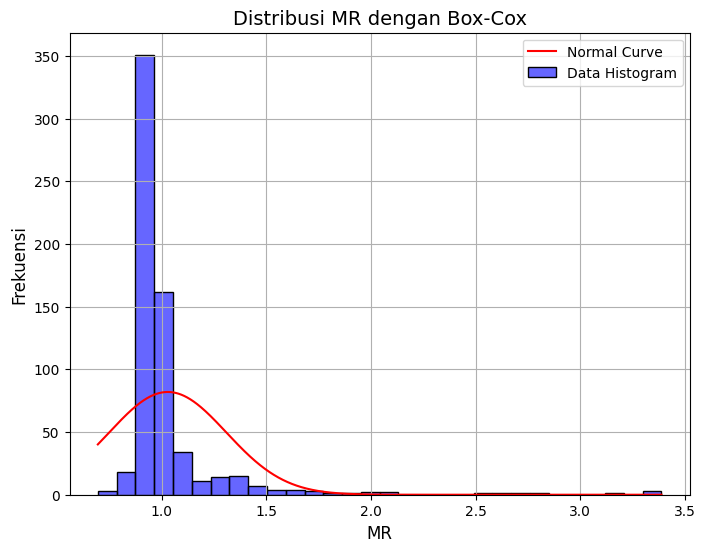

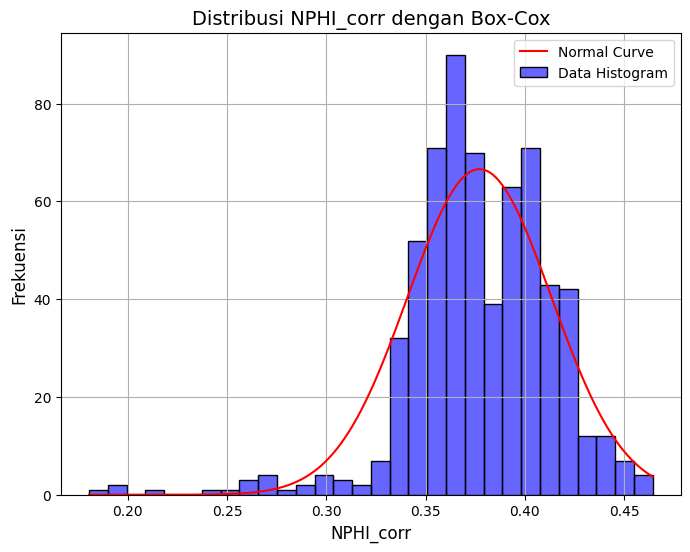

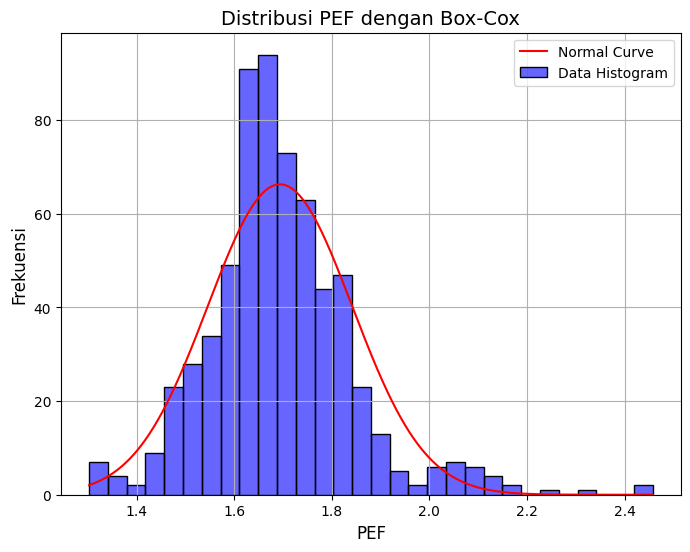

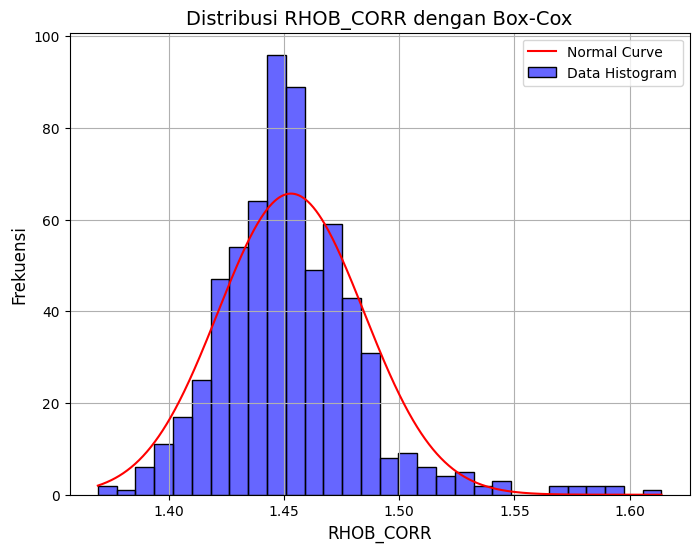

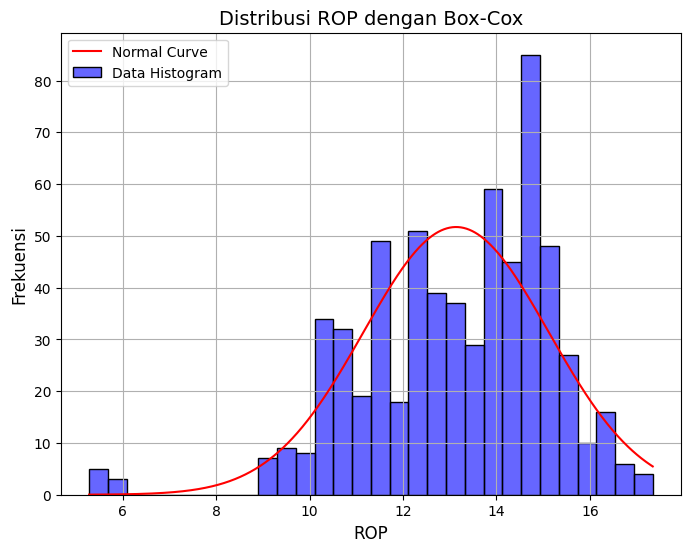

In [19]:
histogram_norm(tmp_X_bc,judul='dengan Box-Cox')

In [20]:
tmp_X_bc.apply(lambda col: shapiro(col)[1])

,0
CALI,2.380838e-09
DRHO,2.192563e-14
GR,1.132077e-12
MR,3.493482e-40
NPHI_corr,4.124330e-16
PEF,3.753611e-14
RHOB_CORR,3.151564e-16
ROP,1.551623e-12


### Yeo-Johnson

In [21]:
from sklearn.preprocessing import PowerTransformer

tmp_X_yj = X_train.copy()

yj_transformer = PowerTransformer(method='yeo-johnson',standardize=False)
yeo_johnson_data = pd.DataFrame(yj_transformer.fit_transform(tmp_X_yj))
yeo_johnson_data.columns = tmp_X_yj.columns.values
yeo_johnson_data.index = tmp_X_yj.index.values
df_tf_temp = yeo_johnson_data
for i in df_tf_temp.columns:
 tmp_X_yj[i]=df_tf_temp[i]

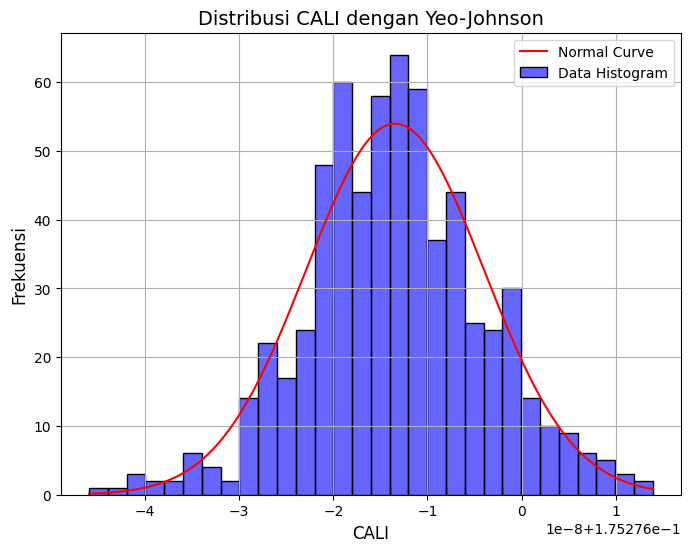

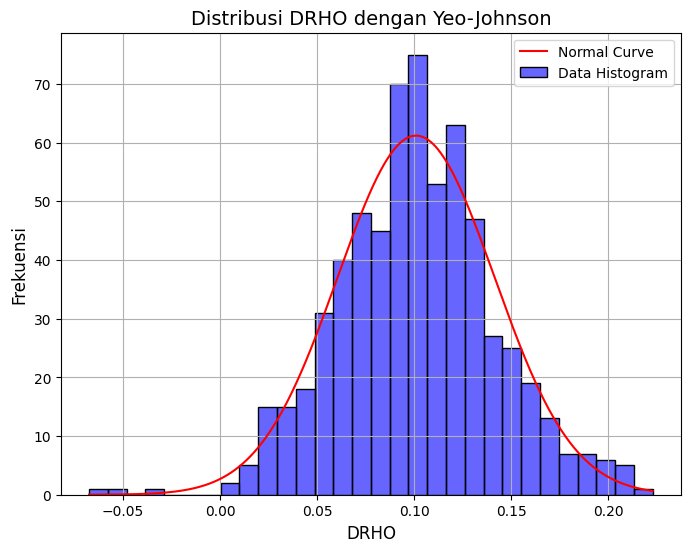

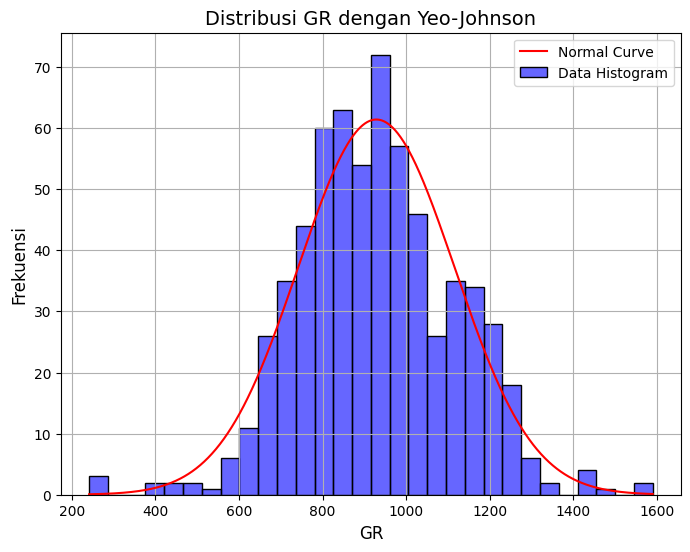

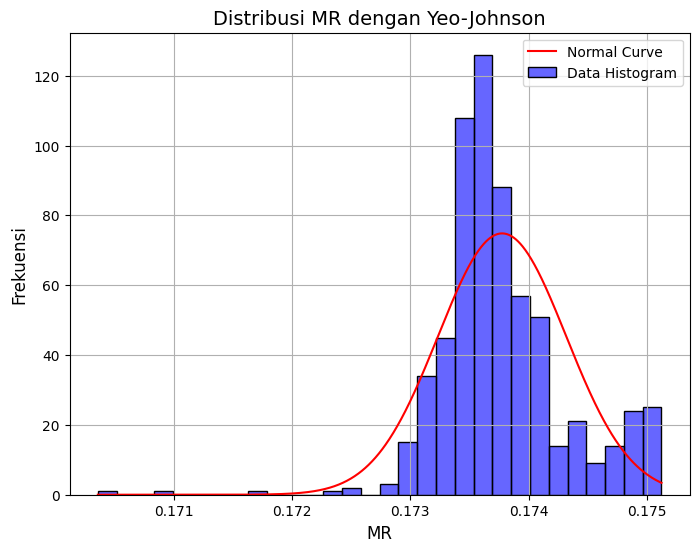

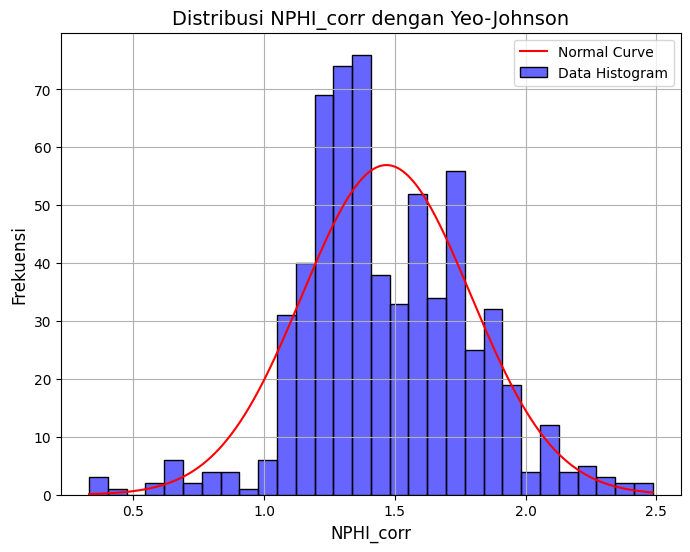

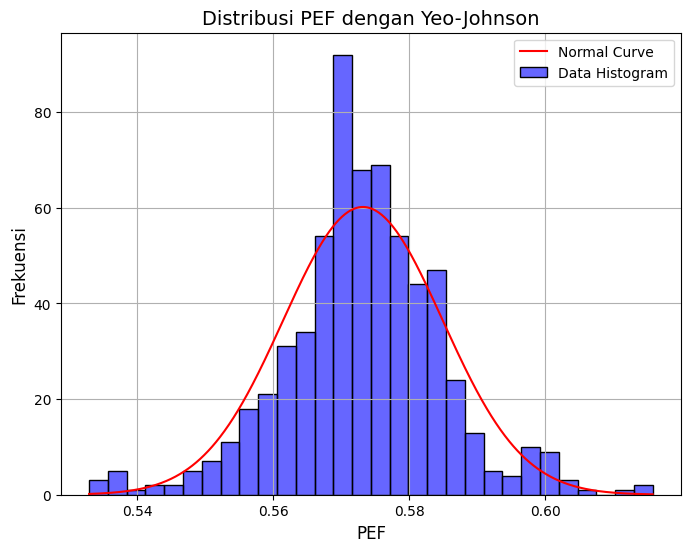

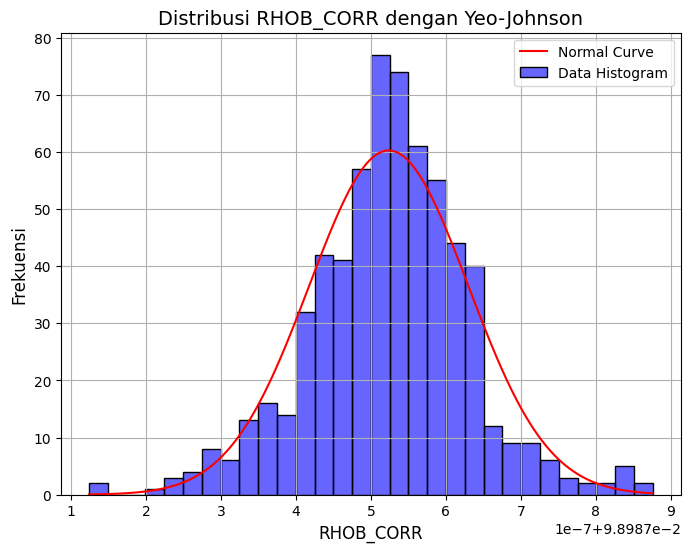

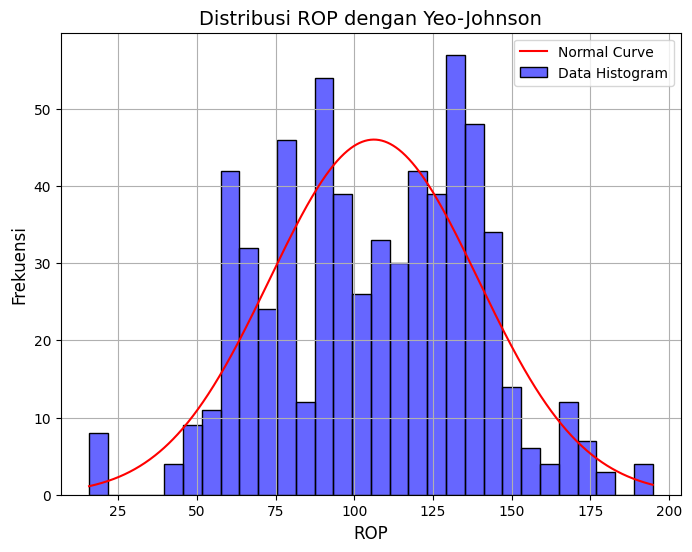

In [22]:
histogram_norm(tmp_X_yj,judul='dengan Yeo-Johnson')

In [23]:
tmp_X_yj.apply(lambda col: shapiro(col)[1])

,0
CALI,1.608751e-02
DRHO,4.815424e-03
GR,7.575384e-04
MR,1.537462e-19
NPHI_corr,2.178357e-07
PEF,9.714151e-08
RHOB_CORR,9.110915e-06
ROP,1.539387e-05


### Quantile Transformation

In [24]:
from sklearn.preprocessing import QuantileTransformer

tmp_X_qt = X_train.copy()

qt_transformer = QuantileTransformer(output_distribution='normal')
qt_data = pd.DataFrame(qt_transformer.fit_transform(tmp_X_qt))
qt_data.columns = tmp_X_qt.columns.values
qt_data.index = tmp_X_qt.index.values
df_tf_temp = qt_data
for i in df_tf_temp.columns:
 tmp_X_qt[i]=df_tf_temp[i]

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (640). n_quantiles is set to n_samples.
  warnings.warn(


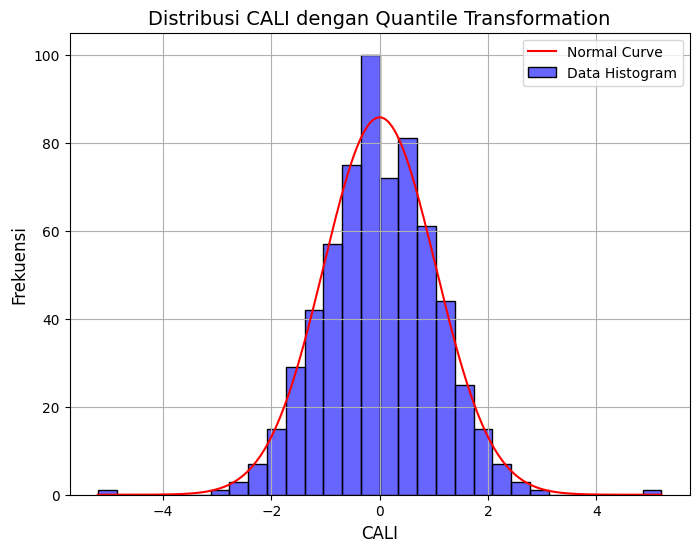

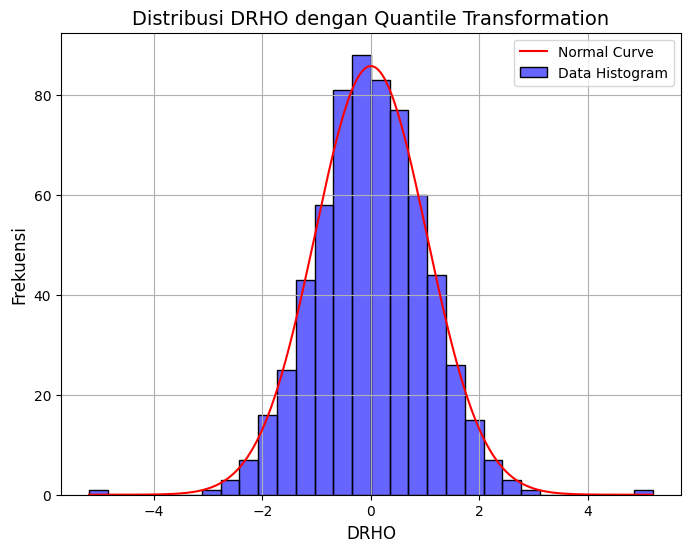

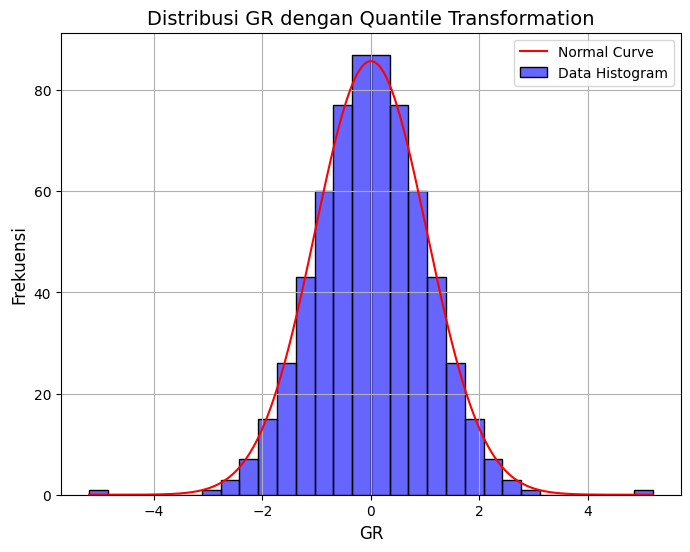

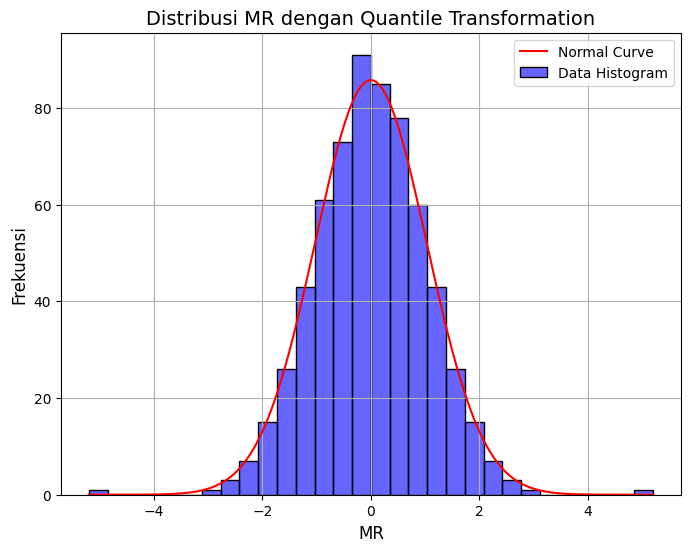

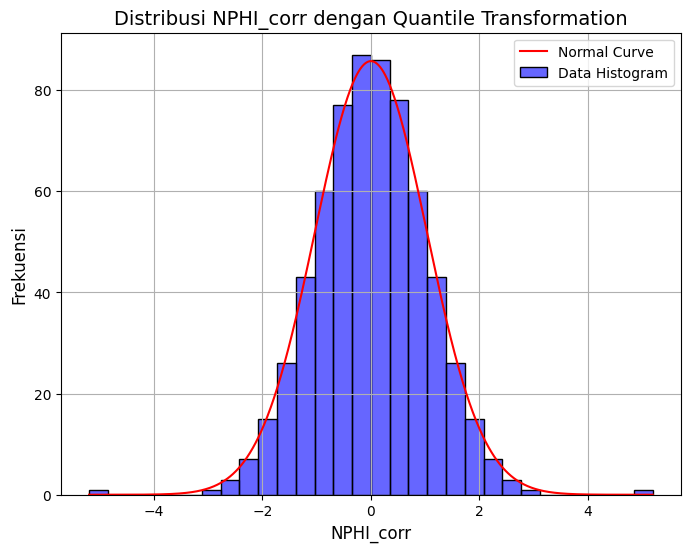

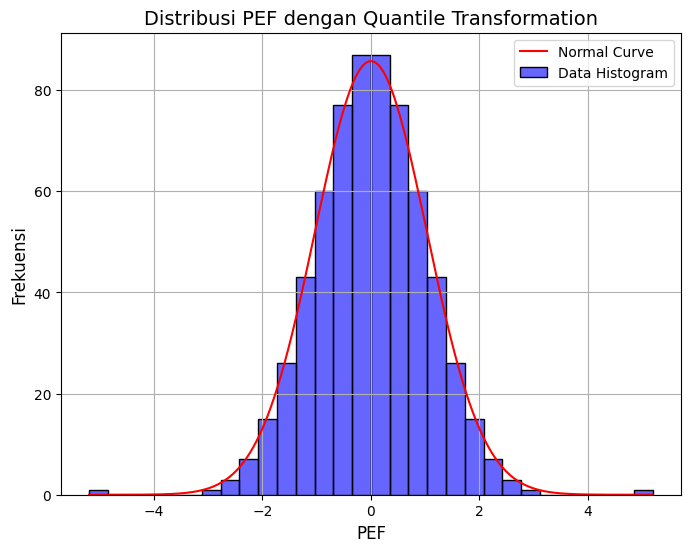

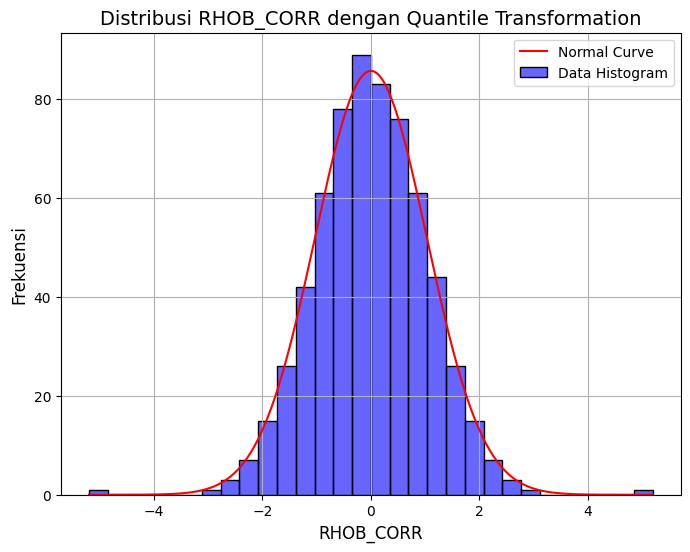

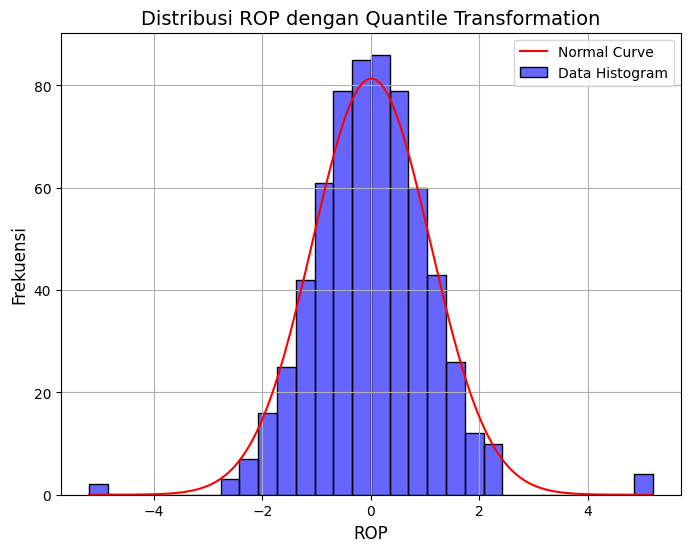

In [25]:
histogram_norm(tmp_X_qt,judul='dengan Quantile Transformation')

In [26]:
tmp_X_qt.apply(lambda col: shapiro(col)[1])

,0
CALI,2.077371e-04
DRHO,2.684841e-04
GR,2.803542e-04
MR,2.750412e-04
NPHI_corr,2.791401e-04
PEF,2.786500e-04
RHOB_CORR,2.708868e-04
ROP,6.699471e-12


### Comparison

In [27]:
from scipy.stats import skew

trans_result=pd.DataFrame({'Kolom':df.columns})
tmp_bc=[]
tmp_yj=[]
tmp_qt=[]
for i in df.columns:
  tmp_bc.append(skew(tmp_X_bc[i]))
  tmp_yj.append(skew(tmp_X_yj[i]))
  tmp_qt.append(skew(tmp_X_qt[i]))

trans_result['Skewness setelah transformasi Box Cox']=tmp_bc
trans_result['Skewness setelah transformasi Yeo Johnson']=tmp_yj
trans_result['Skewness setelah transformasi Quantile']=tmp_qt
trans_result

,Kolom,Skewness setelah transformasi Box Cox,Skewness setelah transformasi Yeo Johnson,Skewness setelah transformasi Quantile
0,CALI,0.649312,-0.017600,7.099692e-04
1,DRHO,1.023486,-0.038113,1.334599e-04
2,GR,-0.889235,0.054165,-5.134286e-07
3,MR,5.285782,0.061434,5.429526e-05
4,NPHI_corr,-1.065172,0.062682,4.420289e-06
5,PEF,0.918460,-0.068305,8.124301e-05
6,RHOB_CORR,1.157493,-0.078621,1.918964e-04
7,ROP,-0.739879,-0.050388,2.751872e-01


In [28]:
from scipy.stats import kurtosis

trans_result_kurtosis=pd.DataFrame({'Kolom':df.columns})
tmp_bc=[]
tmp_yj=[]
tmp_qt=[]
for i in df.columns:
  tmp_bc.append(kurtosis(tmp_X_bc[i]))
  tmp_yj.append(kurtosis(tmp_X_yj[i]))
  tmp_qt.append(kurtosis(tmp_X_qt[i]))

trans_result_kurtosis['Kurtosis setelah transformasi Box Cox']=tmp_bc
trans_result_kurtosis['Kurtosis setelah transformasi Yeo Johnson']=tmp_yj
trans_result_kurtosis['Kurtosis setelah transformasi Quantile']=tmp_qt
trans_result_kurtosis

,Kolom,Kurtosis setelah transformasi Box Cox,Kurtosis setelah transformasi Yeo Johnson,Kurtosis setelah transformasi Quantile
0,CALI,0.879541,0.379918,1.459448
1,DRHO,2.050664,0.659608,1.456206
2,GR,3.399663,0.587572,1.457226
3,MR,34.345547,3.998949,1.457501
4,NPHI_corr,4.003436,0.704129,1.457372
5,PEF,3.097512,1.397720,1.457562
6,RHOB_CORR,3.742750,1.075206,1.457275
7,ROP,1.046531,-0.404279,3.576050


## Apply Quantile Transformation

In [29]:
from sklearn.preprocessing import QuantileTransformer
def transform_quantile(X_train, X_test, X):
    qt_transformer = QuantileTransformer(output_distribution='normal')
    dfs = [X_train, X_test, X]
    qt_dfs = [None,None,None]
    for i, df in enumerate(dfs):
        if (i == 0): #only perform fit_transform on training data
            qt_dfs[i] = pd.DataFrame(qt_transformer.fit_transform(df))
        else:
            qt_dfs[i] = pd.DataFrame(qt_transformer.transform(df))
        qt_dfs[i].columns = df.columns.values
        qt_dfs[i].index = df.index.values
    return qt_dfs[0], qt_dfs[1], qt_dfs[2] #X_train, X_test, X

In [30]:
X_train, X_test, X = transform_quantile(X_train, X_test, X)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (640). n_quantiles is set to n_samples.
  warnings.warn(


## Feature Scaling

karena menggunakan Quatile transformation dengan output gaussian, masing masing kolom secara otomatis ditransformasi ke distribusi normal baku, atau distribusi normal dengan rataan nol dan standar deviasi 1, oleh karena itu tidak diperlukan tambahan scaling.

In [31]:
X_train.describe()

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
count,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.000013,-0.000350,-5.768701e-08,-0.000004,-0.000009,-0.000045,0.000032,0.007614
std,1.031936,1.032425,1.032295e+00,1.032267,1.032284,1.032270,1.032316,1.088146
min,-5.199338,-5.199338,-5.199338e+00,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.646436,-0.675721,-6.744913e-01,-0.678188,-0.675721,-0.678188,-0.670801,-0.674504
50%,-0.003923,0.000000,0.000000e+00,-0.005884,0.000000,0.000000,-0.001961,-0.000981
75%,0.658570,0.672663,6.744913e-01,0.674491,0.674491,0.674491,0.668347,0.670801
max,5.199338,5.199338,5.199338e+00,5.199338,5.199338,5.199338,5.199338,5.199338


# Shutdown colab runtime

In [32]:
# Execution time
end_notebook = time.time()
print(f"Total notebook execution time: {end_notebook - start_notebook:.2f} seconds")

Total notebook execution time: 15.48 seconds


In [ ]:
from google.colab import runtime
runtime.unassign()